# Worksheet 02

Name: William Seong 
UID: U76365580

### Topics

- Effective Programming

### Effective Programming

a) What is a drawback of the top down approach?

No runable code until the end.

b) What is a drawback of the bottom up approach?

Requires much more planning.
Risk wasting a lot of time, making code that you don't end up needing.

c) What are 3 things you can do to have a better debugging experience?

0. Don't Panic
1. Read the error message
2. Re-read the code and understand it, trace the code
3. Sanity check, is everything set up properly
4. Ask the internet

d) (Optional) Follow along with the live coding. You can write your code here:

In [26]:
# 8 Queen Puzzle

class Board:
    
    def __init__(self):
        self.board = [["" for _ in range(8)] for _ in range(8)]
    
    def __repr__(self):
        res = ""
        for row in range(len(self.board)):
            for col in range(len(self.board)):
                res += self.board[row][col]
                res += " | "
            res += "\n"
        return res
    
    def set_queen_at(self, row, col):
        self.board[row][col] = "Q"
        
    def unset_queen_at(self, row):
        self.board[row] = ["" for _ in range(len(self.board))]
        
    def is_valid_move(self):
        return true
        
    def find_solution(self):
        row = 0
        col = 0
        
        while row < len(self.board):
            if self.is_valid_move(row, col): #Implement
                self.set_queen_at(row, col)
                row += 1
                col = 0
            else:
                col += 1
                if col >= 8:
                    # Can't place a queen on this row, so backtrack
                    col = self.get_queen_on_row(row-1) # Implement
                    col += 1

test = Board()
test.set_queen_at(1,1)
# test.unset_queen_at(1)
print(test)

 |  |  |  |  |  |  |  | 
 | Q |  |  |  |  |  |  | 
 |  |  |  |  |  |  |  | 
 |  |  |  |  |  |  |  | 
 |  |  |  |  |  |  |  | 
 |  |  |  |  |  |  |  | 
 |  |  |  |  |  |  |  | 
 |  |  |  |  |  |  |  | 



## Exercise

This exercise will use the [Titanic dataset](https://www.kaggle.com/c/titanic/data) (https://www.kaggle.com/c/titanic/data). Download the file named `train.csv` and place it in the same folder as this notebook.

The goal of this exercise is to practice using [pandas](https://pypi.org/project/pandas/) methods. If your:

1. code is taking a long time to run
2. code involves for loops or while loops
3. code spans multiple lines

look through the pandas documentation for alternatives. This [cheat sheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf) may come in handy.

a) Complete the code below to read in a filepath to the `train.csv` and returns the DataFrame.

In [11]:
import pandas as pd

df = pd.read_csv("train.csv")
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


b) Complete the code so it returns the number of rows that have at least one empty column value

In [13]:
# print(str(df.isnull().sum()))

empty_rows = str(df.isnull().any(axis = "columns").sum())
print(empty_rows)

708


c) Complete the code below to remove all columns with more than 200 NaN values

In [14]:
df = df.dropna(axis = 1, thresh = len(df) - 200)
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

d) Complete the code below to replaces `male` with 0 and `female` with 1

In [16]:
df['Sex'] = df.apply(lambda x : 0 if x["Sex"] == "male" else 1, axis = 1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S


e) Complete the code below to add four columns `First Name`, `Middle Name`, `Last Name`, and `Title` corresponding to the value in the `name` column.

For example: `Braund, Mr. Owen Harris` would be: 

|First Name | Middle Name | Last Name | Title |
|-----------|-------------|-----------|-------|
| Owen      |  Harris     |  Braund   | Mr    |

Anything not clearly one of the above 4 categories can be ignored.

In [41]:
name_array = df["Name"].str.split(pat = " ")
last_name = name_array[2][0]
# df[['First Name', 'Middle Name', 'Last Name', 'Title']] = df["Name"].str.split(pat = " ")
# df.head()
print(name_array)
print(last_name)

0                           [Braund,, Mr., Owen, Harris]
1      [Cumings,, Mrs., John, Bradley, (Florence, Bri...
2                             [Heikkinen,, Miss., Laina]
3      [Futrelle,, Mrs., Jacques, Heath, (Lily, May, ...
4                          [Allen,, Mr., William, Henry]
                             ...                        
886                            [Montvila,, Rev., Juozas]
887                    [Graham,, Miss., Margaret, Edith]
888       [Johnston,, Miss., Catherine, Helen, "Carrie"]
889                           [Behr,, Mr., Karl, Howell]
890                              [Dooley,, Mr., Patrick]
Name: Name, Length: 891, dtype: object
Heikkinen,


f) Complete the code below to replace all missing ages with the average age

In [17]:
df['Age'] = df["Age"].fillna(df['Age'].mean())
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S


g) Plot a bar chart of the average age of those that survived and did not survive. Briefly comment on what you observe.

<AxesSubplot:title={'center':'Average Age of Survived'}, xlabel='Survived', ylabel='Average Age'>

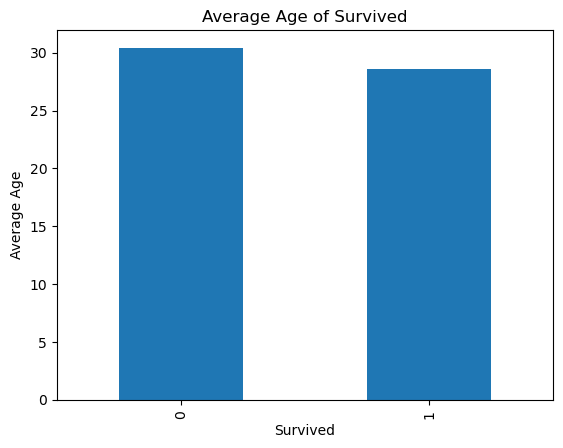

In [18]:
avg = df.groupby("Survived")["Age"].mean()
avg.plot(kind="bar", title = "Average Age of Survived", xlabel = "Survived", ylabel = "Average Age")

In [20]:
# Seems like the average age of the survivors is younger than the average of the deceased.